In [1]:
# Scientific imports

%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# General imports

import csv, math, os, os.path, sys, random, gc, types
from collections import Counter

plt.rcParams["figure.figsize"] = (16,5)
sb.set()

In [2]:
#################################

def GetTICFromPos(arr, pos):
    # MUST BE NUMPY ARRAY
    # MUST BE OF FORM [[TIC, POS]]
    return(arr[np.where(arr[:, 0] == pos)[0][0]][1])

#################################

def GetPosFromTIC(arr, TIC):
    # MUST BE NUMPY ARRAY
    # MUST BE OF FORM [[TIC, POS]]
    TIC = TIC.zfill(10)
    return(arr[np.where(arr[:, 1] == TIC)[0][0]][0])

#################################

def GetFName(arr, TIC_or_POS, verbose=False):
    # MUST BE NUMPY ARRAY
    # MUST BE OF FORM [[TIC, POS]]
    
    if len(TIC_or_POS) < 6:
        # POS
        if verbose:
            print("Detected a position!")
        return(arr[np.where(arr[:, 0] == TIC_or_POS)[0][0]][2])
    else:
        #TIC
        if verbose:
            print("Detected a TIC!")
        TIC_or_POS = TIC_or_POS.zfill(10)
        return(arr[np.where(arr[:, 1] == TIC_or_POS)[0][0]][2])

#################################

def MAKE_REF_LIST(pl, arr):
    helper_arr = []

    for i in pl:
        fname = [x for x in arr if i in x][0]
        w = np.where(arr == fname)[0][0]
        helper_arr.append([int(w),i,fname])
    return (np.array(helper_arr))

#################################

def GenerateLists(all_lists = False):
    # Make Lists
    loc = "./SIM_DATA/unpacked/"

    with open(loc+"jake_PLIST") as f:
        p_list = [int(x) for x in f.read().splitlines()]

    with open(loc+"jake_EBLIST") as f:
        eb_list = [int(x) for x in f.read().splitlines()]

    with open(loc+"jake_BEBLIST") as f:
        beb_list = [int(x) for x in f.read().splitlines()]

    with open(loc+"jake_SLIST") as f:
        s_list = [int(x) for x in f.read().splitlines()]

    uniq_p_list = []

    for i in p_list:
        if p_list.count(i) == 1:
            uniq_p_list.append(str(i).zfill(10))
    
    if all_lists:
        return (uniq_p_list, eb_list, beb_list, s_list)
    else:
        return(uniq_p_list)

#################################

def DrawLC(rndFile=-1):
    
    # rndFile is random, unless specified
    rndFile = random.randint(0,len(fitsarr)) if rndFile==-1 else rndFile
    
    # Get LC data from the requisite fits file
    fitsFile = fitsarr[rndFile]

    # The following line of code gives us the header values
    fitsHeaders = fits.getheader(fitsFile)

    with fits.open(fitsFile, mode="readonly") as hdulist:

        obj       = hdulist[0].header['OBJECT']
        sector    = hdulist[0].header['SECTOR']
        tess_bjds     = hdulist[1].data['TIME']
        pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

    # X- and Y- labels
    ylab = "PDCSAP Flux (e-/s)"
    xlab = "Time (TBJD)"

    #ax.plot(tess_bjds[1:-1], pdcsap_fluxes[1:-1], 'k.', markersize=1)
    return (tess_bjds[1:-1], pdcsap_fluxes[1:-1], str(rndFile), str(obj), str(sector), ylab, xlab)

#################################

In [3]:
#################################
idlist  = np.load("idlist.npy")
fitsarr = np.load("fitslist.npy")
short_fitsarr = np.array([x[40:49] for x in fitsarr])
uniq_p_list = GenerateLists()
#################################

In [4]:
helper_arr = MAKE_REF_LIST(uniq_p_list, fitsarr)

len(helper_arr), helper_arr[:5]

(1115,
 array([['5002', '0006400274',
         'SIM_DATA/tess2018191215100-s0001-0000000006400274-0001-a_lc.fits'],
        ['13302', '0006949210',
         'SIM_DATA/tess2018191215100-s0001-0000000006949210-0001-a_lc.fits'],
        ['9546', '0007088246',
         'SIM_DATA/tess2018191215100-s0001-0000000007088246-0001-a_lc.fits'],
        ['14005', '0061090239',
         'SIM_DATA/tess2018191215100-s0001-0000000061090239-0001-a_lc.fits'],
        ['4207', '0061135882',
         'SIM_DATA/tess2018191215100-s0001-0000000061135882-0001-a_lc.fits']],
       dtype='<U64'))

In [5]:
GetPosFromTIC(helper_arr,'6400274')

'5002'

In [6]:
GetTICFromPos(helper_arr,'5002')

'0006400274'

In [7]:
GetFName(helper_arr,'5002')

'SIM_DATA/tess2018191215100-s0001-0000000006400274-0001-a_lc.fits'

In [8]:
GetFName(helper_arr,'6400274')

'SIM_DATA/tess2018191215100-s0001-0000000006400274-0001-a_lc.fits'

In [9]:
for i in helper_arr[:,0][:5]:
    print(i, ":", type(i))

5002 : <class 'numpy.str_'>
13302 : <class 'numpy.str_'>
9546 : <class 'numpy.str_'>
14005 : <class 'numpy.str_'>
4207 : <class 'numpy.str_'>


In [43]:
# img save test
loc = "./img/lcs/"
plt.rcParams["figure.figsize"] = (10,5)

for i in helper_arr[:,0]:
    
    x,y,f,o,s,ylab,xlab = DrawLC(int(i))
    
    fig, ax = plt.subplots()
    ax.plot(x,y, 'k.', markersize=0.5)

    fig.suptitle("File № {} - {}".format(f, o), fontsize=20) # + str(obj) + " - Sector " + str(sector))

    ax.set_xlabel(xlab, fontsize=16)
    ax.set_ylabel(ylab, fontsize=16)
    
    fig.figure.savefig(f"./img/lcs/lc_{i}.png")
    plt.close()

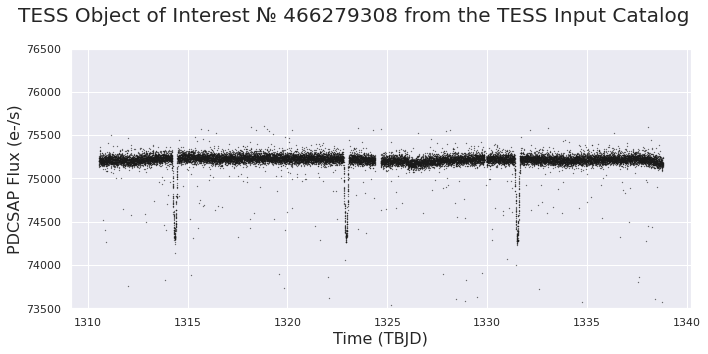

In [10]:
plt.rcParams["figure.figsize"] = (10,5)
x,y,f,o,s,ylab,xlab = DrawLC(3553)

fig, ax = plt.subplots()
ax.plot(x,y, 'k.', markersize=0.55)

#fig.suptitle("File № {} - {}".format(f, o), fontsize=20) # + str(obj) + " - Sector " + str(sector))
fig.suptitle(f"TESS Object of Interest № {o[4:]} from the TESS Input Catalog", fontsize=20) # + str(obj) + " - Sector " + str(sector))

plt.ylim([73500,76500])

ax.set_xlabel(xlab, fontsize=16)
ax.set_ylabel(ylab, fontsize=16)

plt.tight_layout()

plt.savefig("./img/actual_light_curve.png")

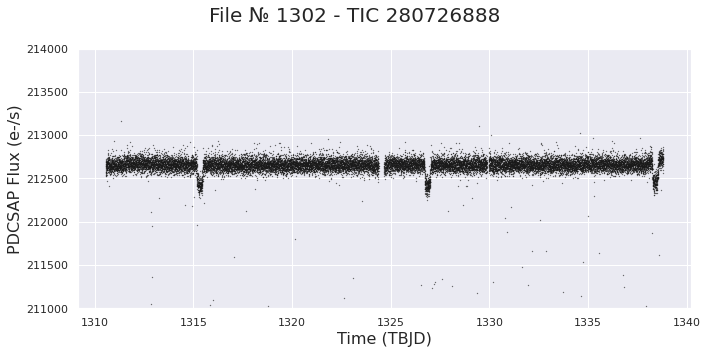

In [11]:
plt.rcParams["figure.figsize"] = (10,5)
x,y,f,o,s,ylab,xlab = DrawLC(1302)

fig, ax = plt.subplots()
ax.plot(x,y, 'k.', markersize=0.55)

fig.suptitle("File № {} - {}".format(f, o), fontsize=20) # + str(obj) + " - Sector " + str(sector))

plt.ylim([211000,214000])

ax.set_xlabel(xlab, fontsize=16)
ax.set_ylabel(ylab, fontsize=16)

plt.tight_layout()

#plt.savefig("./img/actual_light_curve.png")

In [12]:
'276646863' in uniq_p_list

False

In [13]:
uniq_p_list[:10]

['0006400274',
 '0006949210',
 '0007088246',
 '0061090239',
 '0061135882',
 '0061326006',
 '0061458992',
 '0061811090',
 '0061897601',
 '0062119727']

In [14]:
P, EB, BEB, S = GenerateLists(True)

In [15]:
UP = list(set(P).difference(EB))

In [16]:
sP = [int(x) for x in P]

In [17]:
X = list(set(sP) - set(BEB))
len(X), len(UP), len(P), len(S)

(1051, 1115, 1115, 8624)

In [18]:
c = 0
for i in sP:
    if i in BEB:
        c += 1
        #print(f"WE GOT A DUPE BOYS! -- {i}")
        #break
c

64

In [20]:
def MakePictures(inArr, numplots=5):
    fig = plt.figure(figsize=(16,20))

    for i in range(numplots):
        plt.subplot(numplots, 1, i+1)
        plt.plot(lcArray[i][0], lcArray[i][1], 'k.', markersize=0.5)

        LB = np.percentile(lcArray[i][1],1.5)
        UB = np.percentile(lcArray[i][1],99.5)

        plt.xlim([0,30])
        plt.ylim([LB,UB])

    #    if i==1:
    #        plt.ylim([1.01,0.99])

        fileID = lcArray[i][2]
        TICID  = lcArray[i][3]

        print(f"File № {fileID}")
        print(lcArray[i][3])
        print("")

        plt.title(f"File № {fileID} - {TICID}", fontsize=22)

        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        #plt.xlabel("2nd and 99th percentile: {}, {}".format(LB,UB))


    fig.add_subplot(111, frameon=False)

    plt.xticks([])
    plt.yticks([])

    plt.ylabel("Normalised Observed Fluxes", fontsize=26, labelpad=100)
    plt.xlabel("Normalised Observation Time (Days)", fontsize=26, labelpad=50)
    plt.tight_layout()

    #plt.savefig("img/exoplanetExmplesNEW_04.png")

    plt.rcParams["figure.figsize"] = (16,4)

In [23]:
arr = random.sample(X, 10)
arr

[355093383,
 347331554,
 114733122,
 55758992,
 150513824,
 382575703,
 50386332,
 149391535,
 404220615,
 167811187]